In [4]:
## this is the code required portions of the PSET // later to be transferred to
## to the LaTeX homework sheet

In [5]:
## IMPORTS
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import log, factorial
from scipy.optimize import minimize

In [6]:
def neg_log_likelihood(lambda_estimate, obs):
    ## direct implementation of the equation found in q1 
    n = len(obs)
    sum_x_i = sum(obs)
    log_fact_sum = sum(log(factorial(x)) for x in obs)
    neg_log_likelihood = n * lambda_estimate - \
        sum_x_i * log(lambda_estimate) + log_fact_sum
    return neg_log_likelihood

n_estimate = neg_log_likelihood(
    20, [22, 23, 23, 12, 18, 25, 23, 14])
print(n_estimate)

23.551530395903967


In [7]:
from scipy.optimize import minimize

def optimize_lambda(obs):
    def objective(lambda_): return neg_log_likelihood(
        lambda_, obs)

    result = minimize(objective, n_estimate, bounds=[(1e-5, None)])

    return result.x[0]

max_estimate = optimize_lambda([22, 23, 23, 12, 18, 25, 23, 14])
max_estimate

/var/folders/c1/5zzf4b396wdgc4t2xxg1dqw00000gn/T/ipykernel_27542/4150499435.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sum_x_i * log(lambda_estimate) + log_fact_sum


20.000011410833455

/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/giovannimaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


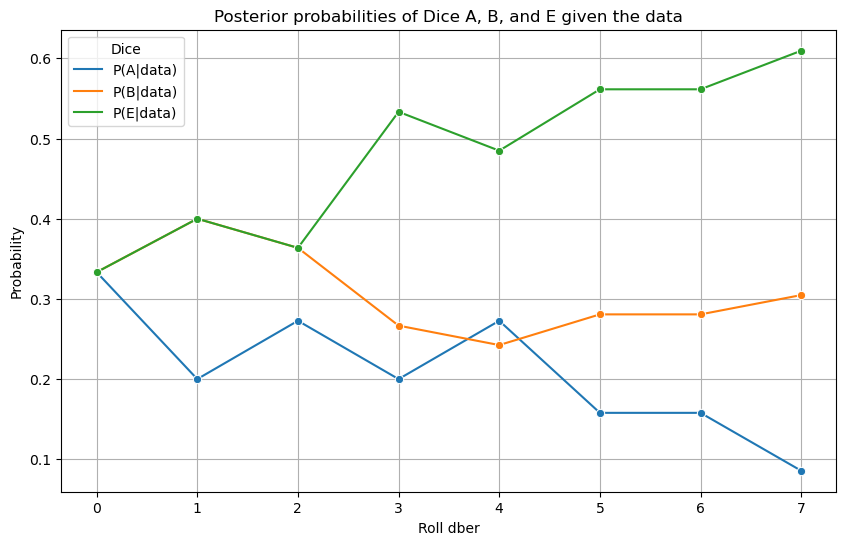

In [8]:
freq_A = [6, 4, 3, 2, 1, 1, 1, 1, 1, 0] 
freq_B = [3, 3, 2, 2, 2, 2, 2, 2, 1, 1]
freq_E = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

cond_A = [f / 20 for f in freq_A]
cond_B = [f / 20 for f in freq_B]
cond_E = [f / 20 for f in freq_E]


data = [5, 3, 9, 3, 8, 4, 7]

## initial posterior probabilities
p_A, p_B, p_E = [1/3], [1/3], [1/3]

for d in data:
    pA = cond_A[d - 1] * p_A[-1]
    pB = cond_B[d - 1] * p_B[-1]
    pE = cond_E[d - 1] * p_E[-1]

    total = pA + pB + pE

    p_A.append(pA / total)
    p_B.append(pB / total)
    p_E.append(pE / total)

df = pd.DataFrame({'roll': range(0, len(data) + 1),
                  'P(A|data)': p_A, 'P(B|data)': p_B, 'P(E|data)': p_E})

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='roll', y='value', hue='variable',
             data=pd.melt(df, ['roll']), marker='o')
plt.title('Posterior probabilities of Dice A, B, and E given the data')
plt.xlabel('Roll dber')
plt.ylabel('Probability')
plt.xticks(range(len(data) + 1))
plt.legend(title='Dice')
plt.grid(True)
plt.show()

In [9]:
print(f"Probability of Die A being selected: {p_A[-1]:.4f}")
print(f"Probability of Die B being selected: {p_B[-1]:.4f}")
print(f"Probability of Die E being selected: {p_E[-1]:.4f}")

Probability of Die A being selected: 0.0857
Probability of Die B being selected: 0.3048
Probability of Die E being selected: 0.6095


In [10]:
p_10_A = 0/20  
p_10_B = 1/20  
p_10_E = 2/20 ## uniform distribution

likelihood_A = p_10_A * p_A[-1]
likelihood_B = p_10_B * p_B[-1]
likelihood_E = p_10_E * p_E[-1]

total = likelihood_A + likelihood_B + likelihood_E

posterior_A = likelihood_A / total
posterior_B = likelihood_B / total
posterior_E = likelihood_E / total

print("Posterior probability for Die A:", posterior_A)
print("Posterior probability for Die B:", posterior_B)
print("Posterior probability for Die E:", posterior_E)

Posterior probability for Die A: 0.0
Posterior probability for Die B: 0.2
Posterior probability for Die E: 0.8


In [16]:
'''
freq_B = [3, 3, 2, 2, 2, 2, 2, 2, 1, 1]
freq_E = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
'''

def update(roll_value, prob_B, prob_E):
    freq_B = [3, 3, 2, 2, 2, 2, 2, 2, 1, 1]
    freq_E = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
    probs_B = [f / 20 for f in freq_B]
    probs_E = [f / 20 for f in freq_E]
    like_B = probs_B[roll_value - 1]
    like_E = probs_E[roll_value - 1]
    post_B = like_B * prob_B / (like_B * prob_B + like_E * prob_E)
    post_E = like_E * prob_E / (like_B * prob_B + like_E * prob_E)
    return post_B, post_E

def simulate_rolls(confidence):
    rolls = 0
    prob_B, prob_E = 0.5, 0.5 ## equal opportunity

    while True:
        rand_roll = np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        prob_B, prob_E = update(rand_roll, prob_B, prob_E)
        rolls += 1
        if prob_B / prob_E >= confidence or prob_E / prob_B >= confidence:
            break

    return rolls

trials = 1000
rolls_needed = [simulate_rolls(99) for _ in range(trials)]

average_rolls = np.mean(rolls_needed)

print("Average rolls needed:", average_rolls)

Average rolls needed: 80.828


In [14]:

def update(roll_value, prob_B, prob_E):
    # Adjusted to match your initial description
    freq_B = [3, 3, 2, 2, 2, 2, 2, 2, 1, 1]
    freq_E = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
    probs_B = [f / 20 for f in freq_B]
    probs_E = [f / 20 for f in freq_E]
    like_B = probs_B[roll_value - 1]
    like_E = probs_E[roll_value - 1]
    post_B = like_B * prob_B / (like_B * prob_B + like_E * prob_E)
    post_E = like_E * prob_E / (like_B * prob_B + like_E * prob_E)
    return post_B, post_E


def simulate_rolls(true_die, confidence, trials):
    rolls_needed = []
    for _ in range(trials):
        rolls = 0
        prob_B, prob_E = 0.5, 0.5  # Reset probabilities for each trial
        while True:
            # Choose the distribution for the true die
            probs = freq_B if true_die == 'B' else freq_E
            # Normalize to get probabilities
            probs = np.array(probs) / sum(probs)
            rand_roll = np.random.choice(np.arange(1, 11))
            prob_B, prob_E = update(rand_roll, prob_B, prob_E)
            rolls += 1
            if prob_B / prob_E >= confidence or prob_E / prob_B >= confidence:
                rolls_needed.append(rolls)
                break

    return np.mean(rolls_needed)


# Number of trials and confidence level
trials = 100
confidence = 99

# Simulate for both dice
average_rolls_B = simulate_rolls('B', confidence, trials)
average_rolls_E = simulate_rolls('E', confidence, trials)

print("Average rolls needed when B is true:", average_rolls_B)
print("Average rolls needed when E is true:", average_rolls_E)

Average rolls needed when B is true: 87.87
Average rolls needed when E is true: 81.61
